In [1]:
# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

# Считывание CSV-файла в объект DataFrame

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv("C:/data/credit.csv", encoding='cp1251', sep=';')

In [3]:
# смотрим форму датафрейма
data.shape

(170746, 15)

In [4]:
# выводим первые 5 наблюдений датафрейма
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,48.0,MAR,UMN,59998,10,28,"0,770249",GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,28.0,MAR,UMN,10889,6,2,"0,248514",GRD,МОСКВА,43000.0,2.0,0.0,0
2,3,M,32.0,MAR,SPC,10728,12,2,"0,459589",SCH,САРАТОВСКАЯ ОБЛАСТЬ,23000.0,5.0,0.0,0
3,4,F,27.0,DIV,SPC,"12009,09",12,2,"0,362536",GRD,ВОЛГОГРАДСКАЯ ОБЛАСТЬ,17000.0,2.0,0.0,0
4,5,M,45.0,MAR,SPC,"16908,89",10,2,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0


In [5]:
# удаляем переменную client_id
del data['client_id']

# Преобразование типов переменных

In [6]:
# смотрим типы переменных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
gender                  170746 non-null object
age                     170744 non-null float64
marital_status          170744 non-null object
job_position            170746 non-null object
credit_sum              170745 non-null object
credit_month            170746 non-null int64
tariff_id               170746 non-null int64
score_shk               170743 non-null object
education               170743 non-null object
living_region           170554 non-null object
monthly_income          170745 non-null float64
credit_count            161516 non-null float64
overdue_credit_count    161516 non-null float64
open_account_flg        170746 non-null int64
dtypes: float64(4), int64(3), object(7)
memory usage: 18.2+ MB
None


In [7]:
# преобразуем указанные переменные в тип object
for i in ['gender', 'marital_status', 'job_position', 'education', 
          'tariff_id', 'living_region', 'okrug', 'open_account_flg']:
    if i in data.columns:
        data[i]=data[i].astype('object')

Можно было преобразовать в тип `str`, разница заключается в том, что если при преобразовании в тип `object` значения `NaN` так и остаются значениями `NaN` и нуждаются в импутации, то по итогам преобразования в тип `str` пропуски cформируют отдельную категорию `nan`. В ряде случаев это очень удобно, потому что часто пропуски для категориальных переменных выделяют в отдельную категорию.

In [8]:
# в указанных переменных заменяем запятые на точки и
# преобразуем в тип float
for i in ['credit_sum', 'score_shk']:
    if i in data.columns:
        data[i]=data[i].str.replace(',', '.').astype('float')

In [9]:
# смотрим типы переменных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
gender                  170746 non-null object
age                     170744 non-null float64
marital_status          170744 non-null object
job_position            170746 non-null object
credit_sum              170745 non-null float64
credit_month            170746 non-null int64
tariff_id               170746 non-null object
score_shk               170743 non-null float64
education               170743 non-null object
living_region           170554 non-null object
monthly_income          170745 non-null float64
credit_count            161516 non-null float64
overdue_credit_count    161516 non-null float64
open_account_flg        170746 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 18.2+ MB
None


In [10]:
# выводим первые 5 наблюдений датафрейма
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,48.0,MAR,UMN,59998.00,10,28,0.770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,F,28.0,MAR,UMN,10889.00,6,2,0.248514,GRD,МОСКВА,43000.0,2.0,0.0,0
2,M,32.0,MAR,SPC,10728.00,12,2,0.459589,SCH,САРАТОВСКАЯ ОБЛАСТЬ,23000.0,5.0,0.0,0
3,F,27.0,DIV,SPC,12009.09,12,2,0.362536,GRD,ВОЛГОГРАДСКАЯ ОБЛАСТЬ,17000.0,2.0,0.0,0
4,M,45.0,MAR,SPC,16908.89,10,2,0.421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0


# Переименование категорий переменных

In [11]:
# создаем словарь, в котором ключем является старое
# название категории, значением – новое название
# категории
d = {'M':'Male', 'F':'Female'}

# передаем словарь в метод map
data['gender'] = data['gender'].map(d)
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,Male,48.0,MAR,UMN,59998.00,10,28,0.770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,Female,28.0,MAR,UMN,10889.00,6,2,0.248514,GRD,МОСКВА,43000.0,2.0,0.0,0
2,Male,32.0,MAR,SPC,10728.00,12,2,0.459589,SCH,САРАТОВСКАЯ ОБЛАСТЬ,23000.0,5.0,0.0,0
3,Female,27.0,DIV,SPC,12009.09,12,2,0.362536,GRD,ВОЛГОГРАДСКАЯ ОБЛАСТЬ,17000.0,2.0,0.0,0
4,Male,45.0,MAR,SPC,16908.89,10,2,0.421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0


In [12]:
# создаем словарь, в котором ключем является старое
# название категории, значением – новое название
# категории
f = {'Male':'M', 'Female':'F'}

# передаем в метод replace словарь, в котором ключем
# будет название переменной, а значением - словарь со
# старыми и новыми названиями категорий
data = data.replace({'gender': f})
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,48.0,MAR,UMN,59998.00,10,28,0.770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,F,28.0,MAR,UMN,10889.00,6,2,0.248514,GRD,МОСКВА,43000.0,2.0,0.0,0
2,M,32.0,MAR,SPC,10728.00,12,2,0.459589,SCH,САРАТОВСКАЯ ОБЛАСТЬ,23000.0,5.0,0.0,0
3,F,27.0,DIV,SPC,12009.09,12,2,0.362536,GRD,ВОЛГОГРАДСКАЯ ОБЛАСТЬ,17000.0,2.0,0.0,0
4,M,45.0,MAR,SPC,16908.89,10,2,0.421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0


# Обработка редких категорий

In [13]:
# выводим частоты категорий по каждой
# категориальной переменной
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
for c in categorical_columns:
    print(data[c].value_counts())

F    88697
M    82049
Name: gender, dtype: int64
MAR    93955
UNM    52148
DIV    16970
CIV     4196
WID     3475
Name: marital_status, dtype: int64
SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64
2     69355
28    39117
19    15537
20    10970
25     7497
30     5538
22     3930
18     3339
3      3232
1      2245
23     2228
6      2102
29     1007
8       766
4       717
9       579
7       540
32      414
10      376
11      370
31      317
12      303
21      132
13       56
5        36
14       11
16       10
26        7
15        6
24        5
27        2
33        1
17        1
Name: tariff_id, dtype: int64
SCH    87536
GRD    72594
UGR     9941
PGR      565
ACD      107
Name: education, dtype: int64
МОСКОВСКАЯ ОБЛАСТЬ                     12844


In [14]:
# выводим частоты категорий для переменной job_position,
# dropna=False выведет частоту пропусков, если они есть 
print(data['job_position'].value_counts(dropna=False))

SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64


In [15]:
# записываем указанные категории переменной
# job_position в отдельную категорию OTHER
data.at[data['job_position'] == 'PNV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'PNS', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'HSK', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'INV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'ONB', 'job_position'] = 'OTHER'

In [16]:
# выводим частоты категорий для переменной job_position
print(data['job_position'].value_counts(dropna=False))

SPC      134680
UMN       17674
BIS        5591
PNA        4107
DIR        3750
ATP        2791
WRK         656
NOR         537
WOI         352
INP         241
BIU         126
WRP         110
OTHER        66
PNI          65
Name: job_position, dtype: int64


In [17]:
# выводим частоты категорий для переменной tariff_id
print(data['tariff_id'].value_counts(dropna=False))

2     69355
28    39117
19    15537
20    10970
25     7497
30     5538
22     3930
18     3339
3      3232
1      2245
23     2228
6      2102
29     1007
8       766
4       717
9       579
7       540
32      414
10      376
11      370
31      317
12      303
21      132
13       56
5        36
14       11
16       10
26        7
15        6
24        5
27        2
33        1
17        1
Name: tariff_id, dtype: int64


In [18]:
# все категории переменной tariff_id с частотой 
# менее 55 наблюдений записываем в отдельную
# категорию 99
data.loc[data['tariff_id'].value_counts()[data['tariff_id']].values < 55, 
         'tariff_id'] = '99'

In [19]:
# выводим частоты категорий для переменной tariff_id
print(data['tariff_id'].value_counts(dropna=False))

2     69355
28    39117
19    15537
20    10970
25     7497
30     5538
22     3930
18     3339
3      3232
1      2245
23     2228
6      2102
29     1007
8       766
4       717
9       579
7       540
32      414
10      376
11      370
31      317
12      303
21      132
99       79
13       56
Name: tariff_id, dtype: int64


In [20]:
# выводим частоты для последних 10 категорий
# переменной living_region
print(data['living_region'].value_counts(dropna=False).tail(10))

РЕСПУБЛИКА КАЛМЫКИЯ             305
ЕВРЕЙСКАЯ АВТОНОМНАЯ ОБЛАСТЬ    203
NaN                             192
МАГАДАНСКАЯ ОБЛАСТЬ             159
РЕСПУБЛИКА ДАГЕСТАН              69
РЕСПУБЛИКА АЛТАЙ                 54
ЧУКОТСКИЙ АВТОНОМНЫЙ ОКРУГ       32
ЧЕЧЕНСКАЯ РЕСПУБЛИКА             31
РЕСПУБЛИКА ИНГУШЕТИЯ             19
ЧИТИНСКАЯ ОБЛАСТЬ                17
Name: living_region, dtype: int64


In [21]:
# все категории переменной living_region с частотой 
# <= 50 наблюдений записываем в отдельную
# категорию OTHER
data['living_region'].loc[data.groupby ('living_region')['living_region'].
                          transform ('count').fillna(data['living_region'].
                          isnull().sum()) <= 50] = 'OTHER'

In [22]:
# выводим частоты для последних 10 категорий 
# переменной living_region
print(data['living_region'].value_counts(dropna=False).tail(10))

РЕСПУБЛИКА ХАКАСИЯ                     480
КАМЧАТСКИЙ КРАЙ                        412
РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ    379
РЕСПУБЛИКА КАЛМЫКИЯ                    305
ЕВРЕЙСКАЯ АВТОНОМНАЯ ОБЛАСТЬ           203
NaN                                    192
МАГАДАНСКАЯ ОБЛАСТЬ                    159
OTHER                                   99
РЕСПУБЛИКА ДАГЕСТАН                     69
РЕСПУБЛИКА АЛТАЙ                        54
Name: living_region, dtype: int64


# Разбиение набора данных на обучающую и контрольную

In [23]:
# с помощью метода .sample() из исходного 
# датафрейма data случайно отбираем 
# 70% наблюдений в обучающий датафрейм train
train=data.sample(frac=0.7,random_state=200)

# в исходном датафрейме data оставляем только те 
# наблюдения, индексные метки которых отличаются 
# от индекса наблюдений, попавших в обучающий датафрейм 
# train, и записываем контрольный датафрейм test
test=data.drop(train.index)

In [24]:
# выводим информацию о количестве пропусков
# по каждой переменной в обучающей выборке
train.isnull().sum()

gender                     0
age                        2
marital_status             1
job_position               0
credit_sum                 0
credit_month               0
tariff_id                  0
score_shk                  3
education                  2
living_region            139
monthly_income             1
credit_count            6477
overdue_credit_count    6477
open_account_flg           0
dtype: int64

In [25]:
# выводим информацию о количестве пропусков
# по каждой переменной в контрольной выборке
test.isnull().sum()

gender                     0
age                        0
marital_status             1
job_position               0
credit_sum                 1
credit_month               0
tariff_id                  0
score_shk                  0
education                  1
living_region             53
monthly_income             0
credit_count            2753
overdue_credit_count    2753
open_account_flg           0
dtype: int64

In [26]:
# заполняем пропуски в переменной age медианой
train['age'].fillna(train['age'].median(), inplace=True)
test['age'].fillna(train['age'].median(), inplace=True)

In [27]:
# заполняем пропуски в переменных credit_sum, score_shk 
# и monthly_income медианами
for i in ['credit_sum', 'score_shk', 'monthly_income']:
    if i in train.columns:
        train[i].fillna(train[i].median(), inplace=True)

for i in ['credit_sum', 'score_shk', 'monthly_income']:
    if i in test.columns:
        test[i].fillna(train[i].median(), inplace=True)

Импутацию средним, медианой и модой необходимо выполнять после разбиения набора данных на обучающую и контрольную выборки. Если выполнить импутацию на всем наборе, а потом разбить его на обучающую и контрольную выборки, получится, что для вычисления статистик, с помощью которых мы импутировали пропуски, использовались все наблюдения набора, часть из которых потом у нас вошла в контрольную выборку (по сути выборку новых данных). Поэтому получается, что статистики для импутации, которые мы получили на всем наборе, пришли к нам частично из «будущего» (из новой, контрольной выборки, которой по факту еще нет). Однако мы должны смоделировать наиболее близкую к реальности ситуацию, у нас есть обучающая выборка, никаких новых данных еще нет.

Статистики, вычисленные на обучающей выборке, можно применить для импутации пропусков как в обучающей, так и в контрольной выборках, а можно отдельно вычислить статистики для обучающей выборки, отдельно вычислить статистики для контрольной выборки и выполнить импутацию. 

Помимо импутации средним значением, медианой  и модой пропуски можно заменить значениями-константами (например, часто используется значение -999), а пропуски в категориальных переменных часто кодируют отдельной категорией для пропусков. Импутацию константами и отдельной категорией можно выполнять как до, так и после разбиения на обучение и контроль, потому что в рамках этой операции мы не делаем вычислений, охватывающих все наблюдения исходного набора.

Часто практикуется создание индикаторов пропусков, когда рядом с переменной, у которой пропущены значения,  создается специальная переменная, принимающая значение 1, если значение исходной переменной пропущено, и 0, если значение не пропущено. Их можно также создавать как до, так и после разбиения на обучение и контроль, потому что мы не делаем вычислений, охватывающих все наблюдения исходного набора.

In [28]:
# заполняем пропуски в переменных credit_count,
# overdue_credit_count -1
for i in ['credit_count', 'overdue_credit_count']:
    if i in train.columns:
        train[i].fillna(-1, inplace=True)

for i in ['credit_count', 'overdue_credit_count']:
    if i in test.columns:
        test[i].fillna(-1, inplace=True)

In [29]:
# выводим частоты категорий
# для переменной marital_status
print(train['marital_status'].value_counts(dropna=False))
print(test['marital_status'].value_counts(dropna=False))

MAR    65652
UNM    36580
DIV    11919
CIV     2942
WID     2428
NaN        1
Name: marital_status, dtype: int64
MAR    28303
UNM    15568
DIV     5051
CIV     1254
WID     1047
NaN        1
Name: marital_status, dtype: int64


In [30]:
# выполняем импутацию пропусков модой
train['marital_status'] = train['marital_status'].fillna('MAR')
test['marital_status'] = test['marital_status'].fillna('MAR')

In [31]:
# выводим частоты категорий
# для переменной marital_status
print(train['marital_status'].value_counts(dropna=False))
print(test['marital_status'].value_counts(dropna=False))

MAR    65653
UNM    36580
DIV    11919
CIV     2942
WID     2428
Name: marital_status, dtype: int64
MAR    28304
UNM    15568
DIV     5051
CIV     1254
WID     1047
Name: marital_status, dtype: int64


In [32]:
# вычисляем моду для переменной
# education
train['education'].mode()

0    SCH
dtype: object

In [33]:
# выполняем импутацию пропусков модой
train['education'] = train['education'].fillna('SCH')
test['education'] = test['education'].fillna('SCH')

In [34]:
# выводим частоты для последних 10 категорий
# переменной living_region
print(train['living_region'].value_counts(dropna=False).tail(10))
print(test['living_region'].value_counts(dropna=False).tail(10))

КОСТРОМСКАЯ ОБЛАСТЬ                    343
КАМЧАТСКИЙ КРАЙ                        294
РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ    262
РЕСПУБЛИКА КАЛМЫКИЯ                    210
NaN                                    139
ЕВРЕЙСКАЯ АВТОНОМНАЯ ОБЛАСТЬ           132
МАГАДАНСКАЯ ОБЛАСТЬ                    115
OTHER                                   67
РЕСПУБЛИКА ДАГЕСТАН                     48
РЕСПУБЛИКА АЛТАЙ                        36
Name: living_region, dtype: int64
РЕСПУБЛИКА ХАКАСИЯ                     136
КАМЧАТСКИЙ КРАЙ                        118
РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ    117
РЕСПУБЛИКА КАЛМЫКИЯ                     95
ЕВРЕЙСКАЯ АВТОНОМНАЯ ОБЛАСТЬ            71
NaN                                     53
МАГАДАНСКАЯ ОБЛАСТЬ                     44
OTHER                                   32
РЕСПУБЛИКА ДАГЕСТАН                     21
РЕСПУБЛИКА АЛТАЙ                        18
Name: living_region, dtype: int64


In [35]:
# присваиваем переменной living_region тип str, 
# тем самым записывая пропуски в отдельную
# категорию nan
train['living_region']=train['living_region'].astype('str')
test['living_region']=test['living_region'].astype('str')

In [36]:
# выводим частоты для последних 10 категорий
# переменной living_region
print(train['living_region'].value_counts(dropna=False).tail(10))
print(test['living_region'].value_counts(dropna=False).tail(10))

КОСТРОМСКАЯ ОБЛАСТЬ                    343
КАМЧАТСКИЙ КРАЙ                        294
РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ    262
РЕСПУБЛИКА КАЛМЫКИЯ                    210
nan                                    139
ЕВРЕЙСКАЯ АВТОНОМНАЯ ОБЛАСТЬ           132
МАГАДАНСКАЯ ОБЛАСТЬ                    115
OTHER                                   67
РЕСПУБЛИКА ДАГЕСТАН                     48
РЕСПУБЛИКА АЛТАЙ                        36
Name: living_region, dtype: int64
РЕСПУБЛИКА ХАКАСИЯ                     136
КАМЧАТСКИЙ КРАЙ                        118
РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ    117
РЕСПУБЛИКА КАЛМЫКИЯ                     95
ЕВРЕЙСКАЯ АВТОНОМНАЯ ОБЛАСТЬ            71
nan                                     53
МАГАДАНСКАЯ ОБЛАСТЬ                     44
OTHER                                   32
РЕСПУБЛИКА ДАГЕСТАН                     21
РЕСПУБЛИКА АЛТАЙ                        18
Name: living_region, dtype: int64


# Конструирование новых признаков

In [37]:
# на основе категориальной переменной tariff_id создаем
# количественную переменную tariff
train['tariff']=train['tariff_id'].astype('int')
test['tariff']=test['tariff_id'].astype('int')

In [38]:
# создаем переменную paym, которая 
# является отношением выданной суммы кредита 
# (credit_sum) к сроку кредита (credit_month), 
# то есть ежемесячной суммой кредита
train['paym'] = train['credit_sum'] / train['credit_month']
test['paym'] = test['credit_sum'] / test['credit_month']

# создаем переменную pti, которая является 
# отношением ежемесячной суммы кредита 
# (paym) к ежемесячному заработку 
# (monthly_income) 
train['pti'] = train['paym'] / train['monthly_income']
test['pti'] = test['paym'] / test['monthly_income']

# заменяем бесконечные значения на 1
train['pti'][train['pti'] == np.inf] = 1
test['pti'][test['pti'] == np.inf] = 1

In [39]:
# создаем новые переменные, возведя некоторые
# количественные переменные в квадрат
train['tariff_sq'] = train['tariff']**2
test['tariff_sq'] = test['tariff']**2

train['age_sq'] = train['age']**2
test['age_sq'] = test['age']**2

train['credit_sum_sq'] = train['credit_sum']**2
test['credit_sum_sq'] = test['credit_sum']**2

train['score_sq'] = train['score_shk']**2
test['score_sq'] = test['score_shk']**2

train['income_sq'] = train['monthly_income']**2
test['income_sq'] = test['monthly_income']**2

train['credit_month_sq'] = train['credit_month']**2
test['credit_month_sq'] = test['credit_month']**2

train['credit_count_sq'] = train['credit_count']**2
test['credit_count_sq'] = test['credit_count']**2

## Создание переменной, у которой значения основаны на значениях исходной переменной

In [40]:
# выводим уникальные значения исходной переменной, 
# в данном случае - значения переменной job_position
print(train['job_position'].unique())

['SPC' 'UMN' 'BIS' 'DIR' 'PNA' 'ATP' 'OTHER' 'WRK' 'BIU' 'NOR' 'WOI' 'INP'
 'PNI' 'WRP']


In [41]:
# затем создаем словарь, в котором ключом будет значение 
# исходной переменной job_position, а значением - значение 
# будущей переменной avrzarplata
dct = {'UMN': 51000, 'SPC': 63000, 'INP': 55000, 'DIR': 60000, 
       'ATP': 46000, 'PNA': 71000, 'BIS': 86000, 'WOI': 76000,
       'NOR': 54000,'WRK': 77000, 'WRP': 75000, 'PNV': 67000, 
       'BIU': 43000, 'PNI': 69000, 'HSK': 74000, 'PNS': 44000, 
       'INV': 88000, 'ONB': 62000, 'OTHER':20000}
# Создаем новую переменную avrzarplata, у которой значения 
# сопоставлены значениям переменной job_position
train['avrzarplata'] = train['job_position'].map(dct)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata
53397,M,28.0,UNM,SPC,33579.0,10,20,0.431360,SCH,АМУРСКАЯ ОБЛАСТЬ,...,3357.900000,0.093275,400,784.0,1.127549e+09,0.186071,1.296000e+09,100,4.0,63000
143962,M,38.0,UNM,SPC,23511.0,10,19,0.358472,GRD,СТАВРОПОЛЬСКИЙ КРАЙ,...,2351.100000,0.052247,361,1444.0,5.527671e+08,0.128502,2.025000e+09,100,4.0,63000
146922,F,25.0,MAR,SPC,39990.0,24,25,0.613475,GRD,РОСТОВСКАЯ ОБЛАСТЬ,...,1666.250000,0.033325,625,625.0,1.599200e+09,0.376352,2.500000e+09,576,36.0,63000
63697,F,65.0,UNM,UMN,3490.0,6,18,0.371355,GRD,РЕСПУБЛИКА ХАКАСИЯ,...,581.666667,0.016619,324,4225.0,1.218010e+07,0.137905,1.225000e+09,36,16.0,51000
54503,M,49.0,MAR,BIS,36358.0,10,28,0.645187,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,...,3635.800000,0.072716,784,2401.0,1.321904e+09,0.416266,2.500000e+09,100,4.0,86000


In [42]:
# отключаем экспоненциальную запись
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata
53397,M,28.000,UNM,SPC,33579.000,10,20,0.431,SCH,АМУРСКАЯ ОБЛАСТЬ,...,3357.900,0.093,400,784.000,1127549241.000,0.186,1296000000.000,100,4.000,63000
143962,M,38.000,UNM,SPC,23511.000,10,19,0.358,GRD,СТАВРОПОЛЬСКИЙ КРАЙ,...,2351.100,0.052,361,1444.000,552767121.000,0.129,2025000000.000,100,4.000,63000
146922,F,25.000,MAR,SPC,39990.000,24,25,0.613,GRD,РОСТОВСКАЯ ОБЛАСТЬ,...,1666.250,0.033,625,625.000,1599200100.000,0.376,2500000000.000,576,36.000,63000
63697,F,65.000,UNM,UMN,3490.000,6,18,0.371,GRD,РЕСПУБЛИКА ХАКАСИЯ,...,581.667,0.017,324,4225.000,12180100.000,0.138,1225000000.000,36,16.000,51000
54503,M,49.000,MAR,BIS,36358.000,10,28,0.645,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,...,3635.800,0.073,784,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,86000


## Создание переменной, у которой каждое значение – частота наблюдений в категории переменных

In [43]:
# cоздаем переменную region_cnt, у которой каждое значение - 
# частота наблюдений в категории переменной living_region
train['region_cnt'] = train['living_region'].map(train['living_region'].value_counts())
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,region_cnt
53397,M,28.000,UNM,SPC,33579.000,10,20,0.431,SCH,АМУРСКАЯ ОБЛАСТЬ,...,0.093,400,784.000,1127549241.000,0.186,1296000000.000,100,4.000,63000,618
143962,M,38.000,UNM,SPC,23511.000,10,19,0.358,GRD,СТАВРОПОЛЬСКИЙ КРАЙ,...,0.052,361,1444.000,552767121.000,0.129,2025000000.000,100,4.000,63000,3236
146922,F,25.000,MAR,SPC,39990.000,24,25,0.613,GRD,РОСТОВСКАЯ ОБЛАСТЬ,...,0.033,625,625.000,1599200100.000,0.376,2500000000.000,576,36.000,63000,3024
63697,F,65.000,UNM,UMN,3490.000,6,18,0.371,GRD,РЕСПУБЛИКА ХАКАСИЯ,...,0.017,324,4225.000,12180100.000,0.138,1225000000.000,36,16.000,51000,344
54503,M,49.000,MAR,BIS,36358.000,10,28,0.645,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,...,0.073,784,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,86000,3620


## Создание переменной, у которой каждое значение - среднее значение количественной переменной, взятое по уровню категориальной переменной

In [44]:
# пишем функцию, создающую переменную, у которой каждое 
# значение будет средним значением количественной
# переменной (real_feature), взятым по уровню 
# категориальной переменной (cat_feature)
def code_mean(df, cat_feature, real_feature):
    return (df[cat_feature].map(df.groupby(cat_feature)[real_feature].mean()))

# cоздаем переменную, у которой каждое значение - 
# среднее значение monthly_income в 
# категории переменной living_region
train['region_mean_income'] = code_mean(train, 'living_region', 'monthly_income')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,region_cnt,region_mean_income
53397,M,28.000,UNM,SPC,33579.000,10,20,0.431,SCH,АМУРСКАЯ ОБЛАСТЬ,...,400,784.000,1127549241.000,0.186,1296000000.000,100,4.000,63000,618,38026.071
143962,M,38.000,UNM,SPC,23511.000,10,19,0.358,GRD,СТАВРОПОЛЬСКИЙ КРАЙ,...,361,1444.000,552767121.000,0.129,2025000000.000,100,4.000,63000,3236,32589.184
146922,F,25.000,MAR,SPC,39990.000,24,25,0.613,GRD,РОСТОВСКАЯ ОБЛАСТЬ,...,625,625.000,1599200100.000,0.376,2500000000.000,576,36.000,63000,3024,34645.748
63697,F,65.000,UNM,UMN,3490.000,6,18,0.371,GRD,РЕСПУБЛИКА ХАКАСИЯ,...,324,4225.000,12180100.000,0.138,1225000000.000,36,16.000,51000,344,33443.198
54503,M,49.000,MAR,BIS,36358.000,10,28,0.645,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,...,784,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,86000,3620,34010.613


## Создание категориальной переменной в результате конъюнкции двух переменных

In [45]:
# пишем функцию, которая создает переменную 
# в результате конъюнкции переменных 
# feature1 и feature2
def make_conj(df, feature1, feature2):
    df[feature1 + ' + ' + feature2] = df[feature1].astype(str) + ' + ' + df[feature2].astype(str)
    return (df)
make_conj(train, 'education', 'marital_status')

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,region_cnt,region_mean_income,education + marital_status
53397,M,28.000,UNM,SPC,33579.000,10,20,0.431,SCH,АМУРСКАЯ ОБЛАСТЬ,...,784.000,1127549241.000,0.186,1296000000.000,100,4.000,63000,618,38026.071,SCH + UNM
143962,M,38.000,UNM,SPC,23511.000,10,19,0.358,GRD,СТАВРОПОЛЬСКИЙ КРАЙ,...,1444.000,552767121.000,0.129,2025000000.000,100,4.000,63000,3236,32589.184,GRD + UNM
146922,F,25.000,MAR,SPC,39990.000,24,25,0.613,GRD,РОСТОВСКАЯ ОБЛАСТЬ,...,625.000,1599200100.000,0.376,2500000000.000,576,36.000,63000,3024,34645.748,GRD + MAR
63697,F,65.000,UNM,UMN,3490.000,6,18,0.371,GRD,РЕСПУБЛИКА ХАКАСИЯ,...,4225.000,12180100.000,0.138,1225000000.000,36,16.000,51000,344,33443.198,GRD + UNM
54503,M,49.000,MAR,BIS,36358.000,10,28,0.645,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,...,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,86000,3620,34010.613,SCH + MAR
115316,F,39.000,UNM,SPC,13209.000,10,2,0.455,SCH,РЕСПУБЛИКА САХА (ЯКУТИЯ),...,1521.000,174477681.000,0.207,3600000000.000,100,1.000,63000,1281,55261.237,SCH + UNM
16354,M,30.000,UNM,SPC,15192.050,12,2,0.452,SCH,РЕСПУБЛИКА ТАТАРСТАН,...,900.000,230798383.202,0.204,625000000.000,144,1.000,63000,5368,36299.226,SCH + UNM
98227,F,44.000,WID,SPC,27894.000,10,19,0.493,SCH,РЕСПУБЛИКА КАРЕЛИЯ,...,1936.000,778075236.000,0.243,1814760000.000,100,0.000,63000,466,41057.567,SCH + WID
69607,F,33.000,MAR,SPC,16116.470,10,2,0.479,SCH,КЕМЕРОВСКАЯ ОБЛАСТЬ,...,1089.000,259740605.261,0.230,400000000.000,100,16.000,63000,2066,31852.985,SCH + MAR
99745,F,30.000,UNM,SPC,3712.770,6,29,0.368,SCH,НИЖЕГОРОДСКАЯ ОБЛАСТЬ,...,900.000,13784661.073,0.135,400000000.000,36,9.000,63000,2602,33974.939,SCH + UNM


## Создание количественной переменной, у которой каждое значение - усредненное значение нескольких количественных переменных

In [46]:
# создаем переменную mean_age_tenure, у которой 
# каждое значение - усредненное значение 
# переменных age и credit_month 
train['mean_age_tenure'] = train[['age', 'credit_month']].mean(axis=1)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,region_cnt,region_mean_income,education + marital_status,mean_age_tenure
53397,M,28.000,UNM,SPC,33579.000,10,20,0.431,SCH,АМУРСКАЯ ОБЛАСТЬ,...,1127549241.000,0.186,1296000000.000,100,4.000,63000,618,38026.071,SCH + UNM,19.000
143962,M,38.000,UNM,SPC,23511.000,10,19,0.358,GRD,СТАВРОПОЛЬСКИЙ КРАЙ,...,552767121.000,0.129,2025000000.000,100,4.000,63000,3236,32589.184,GRD + UNM,24.000
146922,F,25.000,MAR,SPC,39990.000,24,25,0.613,GRD,РОСТОВСКАЯ ОБЛАСТЬ,...,1599200100.000,0.376,2500000000.000,576,36.000,63000,3024,34645.748,GRD + MAR,24.500
63697,F,65.000,UNM,UMN,3490.000,6,18,0.371,GRD,РЕСПУБЛИКА ХАКАСИЯ,...,12180100.000,0.138,1225000000.000,36,16.000,51000,344,33443.198,GRD + UNM,35.500
54503,M,49.000,MAR,BIS,36358.000,10,28,0.645,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,...,1321904164.000,0.416,2500000000.000,100,4.000,86000,3620,34010.613,SCH + MAR,29.500


## Категоризация (биннинг) количественной переменной

### Категоризация на основе интервалов, заданных вручную

In [47]:
# задаем точки, в которых будут находится границы категорий 
# (до 50000, от 50000 до 200000, от 200000 и выше) 
bins = [-np.inf, 50000, 200000, np.inf]
# задаем метки для категорий будущей переменной
group_names = ['Low', 'Average', 'High']
# осуществляем биннинг переменной monthly_income 
# и записываем результаты в новую переменную incomecat
train['incomecat'] = pd.cut(train['monthly_income'], bins, labels=group_names)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,region_cnt,region_mean_income,education + marital_status,mean_age_tenure,incomecat
53397,M,28.000,UNM,SPC,33579.000,10,20,0.431,SCH,АМУРСКАЯ ОБЛАСТЬ,...,0.186,1296000000.000,100,4.000,63000,618,38026.071,SCH + UNM,19.000,Low
143962,M,38.000,UNM,SPC,23511.000,10,19,0.358,GRD,СТАВРОПОЛЬСКИЙ КРАЙ,...,0.129,2025000000.000,100,4.000,63000,3236,32589.184,GRD + UNM,24.000,Low
146922,F,25.000,MAR,SPC,39990.000,24,25,0.613,GRD,РОСТОВСКАЯ ОБЛАСТЬ,...,0.376,2500000000.000,576,36.000,63000,3024,34645.748,GRD + MAR,24.500,Low
63697,F,65.000,UNM,UMN,3490.000,6,18,0.371,GRD,РЕСПУБЛИКА ХАКАСИЯ,...,0.138,1225000000.000,36,16.000,51000,344,33443.198,GRD + UNM,35.500,Low
54503,M,49.000,MAR,BIS,36358.000,10,28,0.645,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,...,0.416,2500000000.000,100,4.000,86000,3620,34010.613,SCH + MAR,29.500,Low


### Категоризация на основе децилей

In [48]:
# осуществляем биннинг переменной monthly_income 
# на основе децилей и записываем результаты 
# в новую переменную income_decile
train['income_decile'] = pd.qcut(train['monthly_income'], 10)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,income_sq,credit_month_sq,credit_count_sq,avrzarplata,region_cnt,region_mean_income,education + marital_status,mean_age_tenure,incomecat,income_decile
53397,M,28.000,UNM,SPC,33579.000,10,20,0.431,SCH,АМУРСКАЯ ОБЛАСТЬ,...,1296000000.000,100,4.000,63000,618,38026.071,SCH + UNM,19.000,Low,"(35000.0, 40000.0]"
143962,M,38.000,UNM,SPC,23511.000,10,19,0.358,GRD,СТАВРОПОЛЬСКИЙ КРАЙ,...,2025000000.000,100,4.000,63000,3236,32589.184,GRD + UNM,24.000,Low,"(40000.0, 45000.0]"
146922,F,25.000,MAR,SPC,39990.000,24,25,0.613,GRD,РОСТОВСКАЯ ОБЛАСТЬ,...,2500000000.000,576,36.000,63000,3024,34645.748,GRD + MAR,24.500,Low,"(45000.0, 50000.0]"
63697,F,65.000,UNM,UMN,3490.000,6,18,0.371,GRD,РЕСПУБЛИКА ХАКАСИЯ,...,1225000000.000,36,16.000,51000,344,33443.198,GRD + UNM,35.500,Low,"(30000.0, 35000.0]"
54503,M,49.000,MAR,BIS,36358.000,10,28,0.645,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,...,2500000000.000,100,4.000,86000,3620,34010.613,SCH + MAR,29.500,Low,"(45000.0, 50000.0]"


## Создание бинарной переменной на основе значений количественной переменной

In [49]:
# создаем новую переменную retired, которая принимает 
# значение "Yes", если значение переменной age больше 60, 
# и значение "No" в противном случае
train['retired'] = np.where(train['age']>=60, 'Yes', 'No')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,credit_month_sq,credit_count_sq,avrzarplata,region_cnt,region_mean_income,education + marital_status,mean_age_tenure,incomecat,income_decile,retired
53397,M,28.000,UNM,SPC,33579.000,10,20,0.431,SCH,АМУРСКАЯ ОБЛАСТЬ,...,100,4.000,63000,618,38026.071,SCH + UNM,19.000,Low,"(35000.0, 40000.0]",No
143962,M,38.000,UNM,SPC,23511.000,10,19,0.358,GRD,СТАВРОПОЛЬСКИЙ КРАЙ,...,100,4.000,63000,3236,32589.184,GRD + UNM,24.000,Low,"(40000.0, 45000.0]",No
146922,F,25.000,MAR,SPC,39990.000,24,25,0.613,GRD,РОСТОВСКАЯ ОБЛАСТЬ,...,576,36.000,63000,3024,34645.748,GRD + MAR,24.500,Low,"(45000.0, 50000.0]",No
63697,F,65.000,UNM,UMN,3490.000,6,18,0.371,GRD,РЕСПУБЛИКА ХАКАСИЯ,...,36,16.000,51000,344,33443.198,GRD + UNM,35.500,Low,"(30000.0, 35000.0]",Yes
54503,M,49.000,MAR,BIS,36358.000,10,28,0.645,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,...,100,4.000,86000,3620,34010.613,SCH + MAR,29.500,Low,"(45000.0, 50000.0]",No


In [50]:
# удаляем переменные, созданные в ходе наших "экспериментов"
train.drop(['avrzarplata', 'region_cnt', 'region_mean_income', 
            'education + marital_status', 'mean_age_tenure', 'incomecat', 
            'income_decile', 'retired'], axis=1, inplace=True)

In [51]:
# убеждаемся в отсутствии пропусков в переменных, а также 
# в одинаковом количестве переменных в обучающей 
# и контрольной выборках
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119522 entries, 53397 to 149270
Data columns (total 24 columns):
gender                  119522 non-null object
age                     119522 non-null float64
marital_status          119522 non-null object
job_position            119522 non-null object
credit_sum              119522 non-null float64
credit_month            119522 non-null int64
tariff_id               119522 non-null object
score_shk               119522 non-null float64
education               119522 non-null object
living_region           119522 non-null object
monthly_income          119522 non-null float64
credit_count            119522 non-null float64
overdue_credit_count    119522 non-null float64
open_account_flg        119522 non-null object
tariff                  119522 non-null int32
paym                    119522 non-null float64
pti                     119522 non-null float64
tariff_sq               119522 non-null int32
age_sq                  119522 non

In [52]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dummies.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dummies.columns))

Исходные переменные:
 ['gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education', 'living_region', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq'] 

Переменные после get_dummies:
 ['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq', 'gender_F', 'gender_M', 'marital_status_CIV', 'marital_status_DIV', 'marital_status_MAR', 'marital_status_UNM', 'marital_status_WID', 'job_position_ATP', 'job_position_BIS', 'job_position_BIU', 'job_position_DIR', 'job_position_INP', 'job_position_NOR', 'job_position_OTHER', 'job_position_PNA', 'job_position_PNI', 'job_position_SPC', 'job_position_UMN', 'job_pos

In [53]:
# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 150)
train_dummies.head()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,gender_F,gender_M,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID,job_position_ATP,job_position_BIS,job_position_BIU,job_position_DIR,job_position_INP,job_position_NOR,job_position_OTHER,job_position_PNA,job_position_PNI,job_position_SPC,job_position_UMN,job_position_WOI,job_position_WRK,job_position_WRP,tariff_id_1,tariff_id_2,tariff_id_3,tariff_id_4,tariff_id_6,tariff_id_7,tariff_id_8,tariff_id_9,tariff_id_10,tariff_id_11,tariff_id_12,tariff_id_13,tariff_id_18,tariff_id_19,tariff_id_20,tariff_id_21,tariff_id_22,tariff_id_23,tariff_id_25,tariff_id_28,tariff_id_29,tariff_id_30,tariff_id_31,tariff_id_32,tariff_id_99,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,living_region_OTHER,living_region_nan,living_region_АЛТАЙСКИЙ КРАЙ,living_region_АМУРСКАЯ ОБЛАСТЬ,living_region_АРХАНГЕЛЬСКАЯ ОБЛАСТЬ,living_region_АСТРАХАНСКАЯ ОБЛАСТЬ,living_region_БЕЛГОРОДСКАЯ ОБЛАСТЬ,living_region_БРЯНСКАЯ ОБЛАСТЬ,living_region_ВЛАДИМИРСКАЯ ОБЛАСТЬ,living_region_ВОЛГОГРАДСКАЯ ОБЛАСТЬ,living_region_ВОЛОГОДСКАЯ ОБЛАСТЬ,living_region_ВОРОНЕЖСКАЯ ОБЛАСТЬ,living_region_ЕВРЕЙСКАЯ АВТОНОМНАЯ ОБЛАСТЬ,living_region_ЗАБАЙКАЛЬСКИЙ КРАЙ,living_region_ИВАНОВСКАЯ ОБЛАСТЬ,living_region_ИРКУТСКАЯ ОБЛАСТЬ,living_region_КАБАРДИНО-БАЛКАРСКАЯ РЕСПУБЛИКА,living_region_КАЛИНИНГРАДСКАЯ ОБЛАСТЬ,living_region_КАЛУЖСКАЯ ОБЛАСТЬ,living_region_КАМЧАТСКИЙ КРАЙ,living_region_КАРАЧАЕВО-ЧЕРКЕССКАЯ РЕСПУБЛИКА,living_region_КЕМЕРОВСКАЯ ОБЛАСТЬ,living_region_КИРОВСКАЯ ОБЛАСТЬ,living_region_КОСТРОМСКАЯ ОБЛАСТЬ,living_region_КРАСНОДАРСКИЙ КРАЙ,living_region_КРАСНОЯРСКИЙ КРАЙ,living_region_КУРГАНСКАЯ ОБЛАСТЬ,living_region_КУРСКАЯ ОБЛАСТЬ,living_region_ЛЕНИНГРАДСКАЯ ОБЛАСТЬ,living_region_ЛИПЕЦКАЯ ОБЛАСТЬ,living_region_МАГАДАНСКАЯ ОБЛАСТЬ,living_region_МОСКВА,living_region_МОСКОВСКАЯ ОБЛАСТЬ,living_region_МУРМАНСКАЯ ОБЛАСТЬ,living_region_НИЖЕГОРОДСКАЯ ОБЛАСТЬ,living_region_НОВГОРОДСКАЯ ОБЛАСТЬ,living_region_НОВОСИБИРСКАЯ ОБЛАСТЬ,living_region_ОМСКАЯ ОБЛАСТЬ,living_region_ОРЕНБУРГСКАЯ ОБЛАСТЬ,living_region_ОРЛОВСКАЯ ОБЛАСТЬ,living_region_ПЕНЗЕНСКАЯ ОБЛАСТЬ,living_region_ПЕРМСКИЙ КРАЙ,living_region_ПРИМОРСКИЙ КРАЙ,living_region_ПСКОВСКАЯ ОБЛАСТЬ,living_region_РЕСПУБЛИКА АДЫГЕЯ,living_region_РЕСПУБЛИКА АЛТАЙ,living_region_РЕСПУБЛИКА БАШКОРТОСТАН,living_region_РЕСПУБЛИКА БУРЯТИЯ,living_region_РЕСПУБЛИКА ДАГЕСТАН,living_region_РЕСПУБЛИКА КАЛМЫКИЯ,living_region_РЕСПУБЛИКА КАРЕЛИЯ,living_region_РЕСПУБЛИКА КОМИ,living_region_РЕСПУБЛИКА МАРИЙ ЭЛ,living_region_РЕСПУБЛИКА МОРДОВИЯ,living_region_РЕСПУБЛИКА САХА (ЯКУТИЯ),living_region_РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ,living_region_РЕСПУБЛИКА ТАТАРСТАН,living_region_РЕСПУБЛИКА ТЫВА,living_region_РЕСПУБЛИКА ХАКАСИЯ,living_region_РОСТОВСКАЯ ОБЛАСТЬ,living_region_РЯЗАНСКАЯ ОБЛАСТЬ,living_region_САМАРСКАЯ ОБЛАСТЬ,living_region_САНКТ-ПЕТЕРБУРГ,living_region_САРАТОВСКАЯ ОБЛАСТЬ,living_region_САХАЛИНСКАЯ ОБЛАСТЬ,living_region_СВЕРДЛОВСКАЯ ОБЛАСТЬ,living_region_СМОЛЕНСКАЯ ОБЛАСТЬ,living_region_СТАВРОПОЛЬСКИЙ КРАЙ,living_region_ТАМБОВСКАЯ ОБЛАСТЬ,living_region_ТВЕРСКАЯ ОБЛАСТЬ,living_region_ТОМСКАЯ ОБЛАСТЬ,living_region_ТУЛЬСКАЯ ОБЛАСТЬ,living_region_ТЮМЕНСКАЯ ОБЛАСТЬ,living_region_УДМУРТСКАЯ РЕСПУБЛИКА,living_region_УЛЬЯНОВСКАЯ ОБЛАСТЬ,living_region_ХАБАРОВСКИЙ КРАЙ,living_region_ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,living_region_ЧУВАШСКАЯ РЕСПУБЛИКА,living_region_ЯРОСЛАВСКАЯ ОБЛАСТЬ,open_account_flg_0,open_account_flg_1
53397,28.000,33579.000,10,0.431,36000.000,2.000,0.000,20,3357.900,0.093,400,784.000,1127549241.000,0.186,1296000000.000,100,4.000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
143962,38.000,2

In [54]:
# создаем обучающий и контрольный массивы значений
# зависимой переменной
y_train = train_dummies.loc[:, 'open_account_flg_1']
y_test = test_dummies.loc[:, 'open_account_flg_1']

In [55]:
# создаем обучающий и контрольный массивы 
# значений признаков
X_train = train_dummies.loc[:, 'age':'living_region_ЯРОСЛАВСКАЯ ОБЛАСТЬ']
X_test = test_dummies.loc[:, 'age':'living_region_ЯРОСЛАВСКАЯ ОБЛАСТЬ']

# Построение случайного леса и логистической регрессии

In [56]:
# импортируем класс RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# создаем экземпляр класса RandomForestClassifier
forest=RandomForestClassifier(n_estimators=800, max_depth=17, random_state=152, n_jobs=-1)
# подгоняем модель
forest.fit(X_train, y_train)
# импортируем функцию roc_auc_score
from sklearn.metrics import roc_auc_score
# оцениваем дискриминирующую способность 
# модели случайного леса
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, forest.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.896
AUC на контрольной выборке: 0.766


In [57]:
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression
# создаем экземпляр класса LogisticRegression
# и подгоняем модель
logreg = LogisticRegression().fit(X_train, y_train)
# оцениваем дискриминирующую способность 
# модели логистической регрессии
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.546
AUC на контрольной выборке: 0.545


## Масштабирование

Важнейшей предпосылкой регрессионного анализа является единый масштаб измерения переменных. Давайте отмасштабируем переменные. Самое простое масштабирование подразумевает, что из каждого значения переменной мы вычтем среднее значение и полученный результат разделим на стандартное отклонение:

$$\frac{\Large x_i - mean(x)}{\Large stdev(x)}$$

В итоге мы получаем распределение со средним 0 и стандартным отклонением 1. Именно это и делает класс `StandardScaler`.
Сначала импортируем класс `StandardScaler`, который осуществляет предварительную обработку, а затем создаем его экземпляр.

In [58]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
# создаем экземпляр класса StandardScaler
scaler = StandardScaler()

Затем с помощью метода `fit` мы подгоняем `scaler` на обучающих данных. В отличие от обычных моделей машинного обучения, при вызове метода `fit` `scaler` работает с данными (`X_train`), а ответы (`y_train`) не используются.

In [59]:
# подгоняем модель
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Чтобы применить преобразование, которое мы только что подогнали, то есть фактически отмасштабировать (scale) обучающие и контрольные данные, мы воспользуемся методом `transform`. Метод `transform` используется в `scikit-learn`, когда модель возвращает новое представление данных. Обратите внимамние, мы всегда применяем одинаковое преобразование к обучающему и тестовому наборам. Это означает, что метод `transform` всегда вычитает среднее значение, вычисленное для обучающего набора, и делит на стандартное отклонение, вычисленное также для обучающего набора. Среднее значение и стандартное отклонение переменной для обучающего набора могут отличаться от среднего значения и стандартного отклонения переменной для тестового набора.

In [60]:
# преобразовываем данные
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Построение логистической регрессии на отмасштабированных данных

In [61]:
# строим модель логистической регрессии на данных,
# отмасштабированных с помощью StandardScaler
logreg = LogisticRegression().fit(X_train_scaled, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])))

AUC на обучающей выборке: 0.726
AUC на контрольной выборке: 0.728


## Другие виды масштабирования

`StandardScaler` хорошо работает, когда данные подчиняются нормальному распределению. 
Теперь воспользуемся классом `MinMaxScaler`. Из каждого значения переменной мы вычитаем минимальное значение и полученный результат делим на ширину диапазона (разницу между минимальным и максимальным значениями):

$$\frac{\Large x_i - min(x)}{\Large max(x)-min(x)}$$

В итоге мы сжимаем значения переменных в диапазон от 0 до 1 (или от -1 до 1, если есть отрицательные значения). Этот способ работает лучше в тех случаях, когда `StandardScaler` дает не очень хороший результат. Если распределение не является нормальным или стандартное отклонение является очень маленьким, `MinMaxScaler` сработает лучше.

In [62]:
# применяем MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
scaler2.fit(X_train)
X_train_scaled2 = scaler2.transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

In [63]:
# строим модель логистической регрессии на данных,
# отмасштабированных с помощью MinMaxScaler
logreg = LogisticRegression().fit(X_train_scaled2, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled2)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled2)[:, 1])))

AUC на обучающей выборке: 0.725
AUC на контрольной выборке: 0.727


Однако обратите внимание, что `MinMaxScaler` чувствителен к выбросам, поэтому если данные содержат выбросы, класс `RobustScaler` может дать лучший результат.
Класс `RobustScaler` похож на класс `MinMaxScaler`, но вместо ширины диапазона использует межквартильный размах и поэтому устойчив к выбросам. В основе выполняемого преобразования лежит следующая формула:

$$\frac{\Large x_i - Q_1(x)}{\Large Q_3(x)-Q_1(x)}$$

In [64]:
# применяем RobustScaler
from sklearn.preprocessing import RobustScaler
scaler3 = RobustScaler()
scaler3.fit(X_train)
X_train_scaled3 = scaler3.transform(X_train)
X_test_scaled3 = scaler3.transform(X_test)

In [65]:
# строим модель логистической регрессии на данных,
# отмасштабированных с помощью RobustScaler
logreg = LogisticRegression().fit(X_train_scaled3, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled3)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled3)[:, 1])))

AUC на обучающей выборке: 0.726
AUC на контрольной выборке: 0.728


# Отдельная предварительная подготовка данных для логистической регрессии

In [66]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv("C:/data/credit.csv", encoding='cp1251', sep=';')

In [67]:
# удаляем переменную client_id
del data['client_id']

In [68]:
# все категориальные переменные преобразуем в тип str, 
# записав пропуски в отдельную категорию nan
for i in ['gender', 'marital_status', 'job_position', 'education', 
          'tariff_id', 'living_region', 'open_account_flg']:
    if i in data.columns:
        data[i]=data[i].astype('str')
        
# в указанных переменных заменяем запятые на точки и
# преобразуем в тип float
for i in ['credit_sum', 'score_shk']:
    if i in data.columns:
        data[i]=data[i].str.replace(',', '.').astype('float')

In [69]:
# укрупняем редкие категории
data.at[data['job_position'] == 'PNS', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'HSK', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'INV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'ONB', 'job_position'] = 'OTHER'

data.at[data['tariff_id'] == '14', 'tariff_id'] = '99'
data.at[data['tariff_id'] == '15', 'tariff_id'] = '99'
data.at[data['tariff_id'] == '16', 'tariff_id'] = '99'
data.at[data['tariff_id'] == '17', 'tariff_id'] = '99'
data.at[data['tariff_id'] == '24', 'tariff_id'] = '99'
data.at[data['tariff_id'] == '26', 'tariff_id'] = '99'
data.at[data['tariff_id'] == '27', 'tariff_id'] = '99'
data.at[data['tariff_id'] == '33', 'tariff_id'] = '99'

In [70]:
# разбиваем данные на обучающую и контрольную выборки
train=data.sample(frac=0.7,random_state=200)
test=data.drop(train.index)

In [71]:
# создаем индикатор пропусков для переменной overdue_credit_count,
# если переменная содержит пропуск, индикатор принимает значение 1,
# если не содержит, индикатор принимает значение 0
dct = {'True': 1, 'False': 0}
train['overdue_credit_count_ind'] = train['overdue_credit_count'].isnull().astype('str').map(dct)
test['overdue_credit_count_ind'] = test['overdue_credit_count'].isnull().astype('str').map(dct)

In [72]:
# импутируем пропуски в указанных переменных медианами
for i in ['age', 'credit_sum', 'score_shk', 'monthly_income',
         'credit_count', 'overdue_credit_count']:
    if i in train.columns:
        train[i].fillna(train[i].median(), inplace=True)

for i in ['age', 'credit_sum', 'score_shk', 'monthly_income',
         'credit_count', 'overdue_credit_count']:
    if i in test.columns:
        test[i].fillna(test[i].median(), inplace=True)

In [73]:
# категорию nan в переменных marital_status и education
# заменяем на самую часто встречающуюся категорию
train.at[train['marital_status'] == 'nan', 'marital_status'] = 'MAR'
test.at[test['marital_status'] == 'nan', 'marital_status'] = 'MAR'

train.at[train['education'] == 'nan', 'education'] = 'SCH'
test.at[test['education'] == 'nan', 'education'] = 'SCH'

Важнейшей предпосылкой регрессионного анализа является нормальность распределения переменных. Давайте попробуем приблизить распределение некоторых количественных переменных к нормальному. Чтобы взглянуть на распределение нужно построить гистрограмму распределения, а также график квантиль-квантиль, на котором показана связь между наблюдаемыми значениями переменной и квантилями теоретического распределения (по умолчанию используется нормальное распределение). Если наблюдаемые значения попадают на прямую линию, то теоретическое распределение хорошо подходит к наблюдаемым данным.

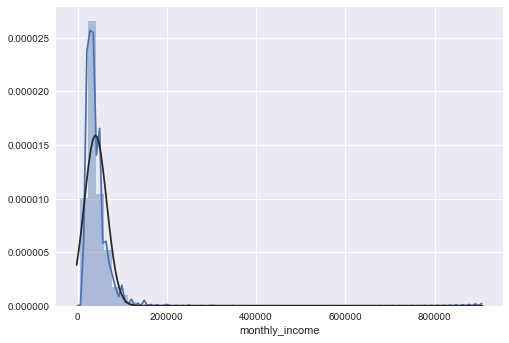

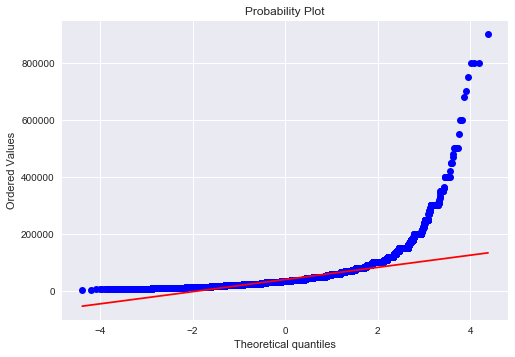

In [74]:
# импортируем библиотеку seaborn, предварительно 
# установив ее в Anaconda Prompt с помощью команды
# conda install -c anaconda seaborn=0.7.1
import seaborn as sns

# импортируем norm и stats
from scipy.stats import norm
from scipy import stats

# строим гистограмму распределения и график
# квантиль-квантиль для переменной monthly_income
sns.distplot(train['monthly_income'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['monthly_income'], plot=plt)

Для распределения, скошенного вправо (положительный коэффициент асимметрии), обычно применяются следующие преобразования: квадратный корень, кубический корень, свернутый корень и логарифм. Для распределения, скошенного влево (отрицательный коэффициент асимметрии), обычно применяются следующие преобразования: квадратный корень (константа – x), кубический корень (константа – x) и логарифм (константа – x). Поскольку логарифм нуля, а равно и любого отрицательного числа, неопределен, перед использованием логарифмического преобразования ко всем значениям нужно добавить константу, чтобы сделать их положительными. При использовании корней обычно корень берут от модуля числа (чтобы не вычислять корни отрицательных чисел) и затем учитывают знак числа.

In [75]:
# вычисляем коэффициент асимметрии
train['monthly_income'].skew()

5.1706215640670719

In [76]:
# вычисляем коэффициент эксцесса
train['monthly_income'].kurtosis()

81.083851580075702

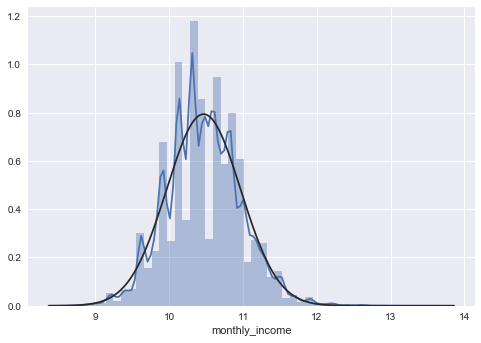

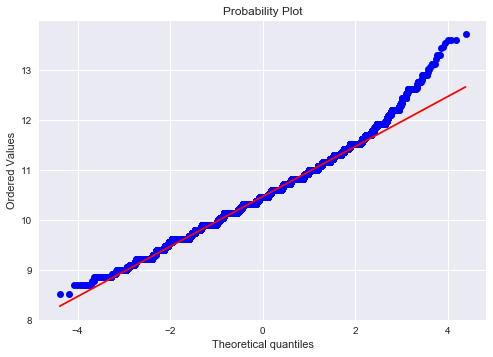

In [77]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование для переменной monthly_income,
# используем константу a, чтобы не брать
# логарифм нуля
a=0.001
sns.distplot(np.log(train['monthly_income']+a), fit=norm);
fig = plt.figure()

res = stats.probplot(np.log(train['monthly_income']+a), plot=plt)

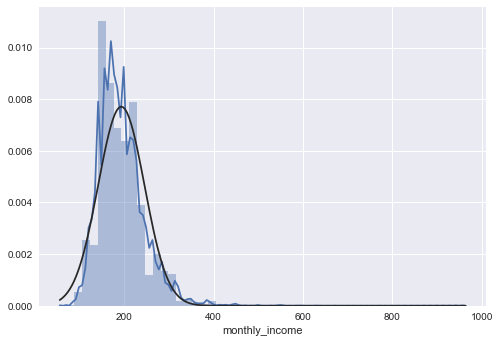

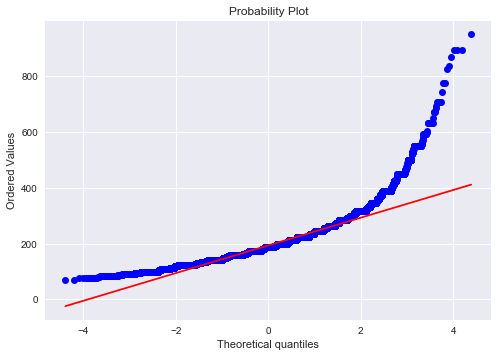

In [78]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# квадратным корнем для переменной monthly_income,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа

sns.distplot(np.sign(train['monthly_income']) * 
             (train['monthly_income'].abs()**(1/2)), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['monthly_income']) * 
                     (train['monthly_income'].abs()**(1/2)), plot=plt)

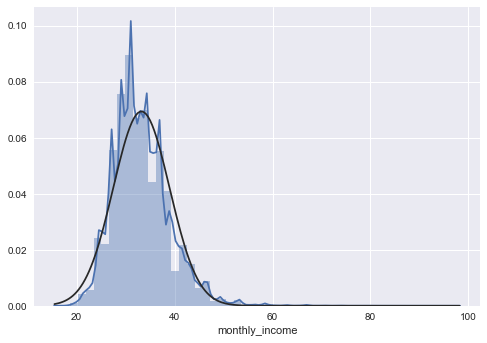

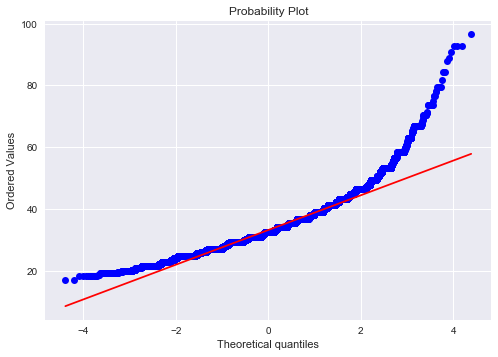

In [79]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# кубическим корнем для переменной monthly_income,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['monthly_income']) * 
             (train['monthly_income'].abs()**(1/3)), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['monthly_income']) * 
                     (train['monthly_income'].abs()**(1/3)), plot=plt)

In [80]:
# выполняем логарифмическое преобразование 
# указанных переменных
train['credit_sum'] = np.log(train['credit_sum']+a)
train['monthly_income'] = np.log(train['monthly_income']+a)
train['age'] = np.log(train['age']+a)

test['credit_sum'] = np.log(test['credit_sum']+a)
test['monthly_income'] = np.log(test['monthly_income']+a)
test['age'] = np.log(test['age']+a)

In [81]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной monthcat
bins = [-np.inf, 7.95, 9.6, 11.25, 13.725, 14.55,
        17.85, 20.325, 23.625, 24.45, 26.925, np.inf]
# осуществляем биннинг переменной credit_month и записываем
# результаты в новую переменную monthcat
train['monthcat'] = pd.cut(train['credit_month'], bins)
test['monthcat'] = pd.cut(test['credit_month'], bins)

In [82]:
# строим таблицу сопряженности monthcat * open_account_flg
biv = pd.crosstab(train['monthcat'], train['open_account_flg'])
biv

open_account_flg,0,1
monthcat,,
"(-inf, 7.95]",7197,2378
"(7.95, 9.6]",928,234
"(9.6, 11.25]",57896,9455
"(11.25, 13.725]",25404,7007
"(13.725, 14.55]",1657,133
"(14.55, 17.85]",331,112
"(17.85, 20.325]",1454,722
"(20.325, 23.625]",21,2
"(23.625, 24.45]",3324,905


In [83]:
# вычисляем WoE для каждой категории переменной monthcat, 
# при этом используем умножение на 1.0,
# чтобы преобразовать во float и добавляем "a=0.0001", 
# чтобы избежать деления на 0
a= 0.0001
WoE = np.log((1.0*biv['0']/sum(biv['0'])+a) / (1.0*biv['1']/sum(biv['1'])+a))
WoE

monthcat
(-inf, 7.95]       -0.437
(7.95, 9.6]        -0.165
(9.6, 11.25]        0.267
(11.25, 13.725]    -0.257
(13.725, 14.55]     0.968
(14.55, 17.85]     -0.450
(17.85, 20.325]    -0.841
(20.325, 23.625]    0.473
(23.625, 24.45]    -0.243
(24.45, 26.925]     0.649
(26.925, inf]      -0.160
dtype: float64

In [84]:
# вычисляем IV для каждой категории переменной monthcat, 
# при этом используем умножение на 1.0,
# чтобы преобразовать во float и добавляем "a=0.0001", 
# чтобы избежать деления на 0
IV_cat=((1.0*biv['0']/sum(biv['0'])+a) - 
          (1.0*biv['1']/sum(biv['1'])+a))*np.log((1.0*biv['0']/sum(biv['0'])+a) 
                                                  / (1.0*biv['1']/sum(biv['1'])+a))
IV_cat

monthcat
(-inf, 7.95]       0.018
(7.95, 9.6]        0.000
(9.6, 11.25]       0.037
(11.25, 13.725]    0.019
(13.725, 14.55]    0.010
(14.55, 17.85]     0.001
(17.85, 20.325]    0.016
(20.325, 23.625]   0.000
(23.625, 24.45]    0.002
(24.45, 26.925]    0.000
(26.925, inf]      0.000
dtype: float64

In [85]:
# вычисляем итоговое IV для переменной monthcat
IV = sum(((1.0*biv['0']/sum(biv['0'])+a) - 
          (1.0*biv['1']/sum(biv['1'])+a))*np.log((1.0*biv['0']/sum(biv['0'])+a) 
                                                  / (1.0*biv['1']/sum(biv['1'])+a)))
IV

0.104003366646915

In [86]:
# пишем функцию, вычисляющую IV
# по всем предикторам
def auto_IV(df): 
    iv_list = [] 
    a= 0.0001
    df_drop = df.drop("open_account_flg", axis=1) 
    for var_name in df_drop: 
        biv = pd.crosstab(df[var_name],df["open_account_flg"])        
        IV = sum(((1.0*biv['0']/sum(biv['0'])+a) - (1.0*biv['1']/sum(biv['1'])+a))*
                 np.log((1.0*biv['0']/sum(biv['0'])+a) / (1.0*biv['1']/sum(biv['1'])+a)))
        iv_list.append(IV)
    col_list =list(df_drop)
    results = pd.DataFrame({'Название переменной' : col_list,'IV' : iv_list})
    results['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная' 
                             if x <= 0.5 and x > 0.3 else 'Средняя'
                             if x <= 0.3 and x > 0.1 else 'Слабая' 
                             if x <= 0.1 and x > 0.02 else 'Бесполезная' 
                             for x in results['IV']]  # по Наиму Сиддики
    return(results.sort_values(by = 'IV', ascending = False))  

In [87]:
auto_IV(train)

,IV,Название переменной,Полезность
4,0.500,credit_sum,Сильная
7,0.326,score_shk,Сильная
6,0.261,tariff_id,Средняя
5,0.110,credit_month,Средняя
14,0.104,monthcat,Средняя
1,0.092,age,Слабая
13,0.083,overdue_credit_count_ind,Слабая
9,0.069,living_region,Слабая
3,0.050,job_position,Слабая
8,0.050,education,Слабая


In [88]:
# выполняем дамми-кодирование
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'open_account_flg_1']
y_test = test_dummies.loc[:, 'open_account_flg_1']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# open_account_flg_0 и open_account_flg_1
train_dummies.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
test_dummies.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'age':'monthcat_(26.925, inf]']
X_test = test_dummies.loc[:, 'age':'monthcat_(26.925, inf]']
# создаем экземпляр класса RandomForestClassifier
forest=RandomForestClassifier(n_estimators=500, max_depth=17, random_state=152, n_jobs=-1)
# подгоняем модель
forest.fit(X_train, y_train)
# cоздаем объект с названиями предикторов
feat_labels = X_train.columns
# cоздаем объект со значениями важностей, вычисленными 
# моделью forest (обратите внимание, речь идет о 
# важностях на основе усредненного уменьшения
# неоднородности)
importances = forest.feature_importances_
# задаем сортировку значений важности и сопоставляем 
# названия предикторов важностям
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 35,
                            feat_labels[indices[f]],
                            importances[indices[f]]))


 1) tariff_id_19                        0.111485
 2) credit_sum                          0.094933
 3) score_shk                           0.083552
 4) age                                 0.079816
 5) monthly_income                      0.051416
 6) overdue_credit_count_ind            0.047378
 7) credit_month                        0.038886
 8) monthcat_(9.6, 11.25]               0.033289
 9) credit_count                        0.032985
10) tariff_id_2                         0.027301
11) education_GRD                       0.019246
12) education_SCH                       0.019213
13) job_position_PNA                    0.017731
14) marital_status_MAR                  0.014512
15) tariff_id_28                        0.012689
16) monthcat_(11.25, 13.725]            0.012588
17) marital_status_UNM                  0.012346
18) gender_M                            0.011594
19) job_position_SPC                    0.011184
20) gender_F                            0.010953
21) monthcat_(-inf, 

In [89]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной credsumcat
bins = [-np.inf, 8.343, 8.558, 8.880, 
        8.987, 9.309, 9.416, 9.631, 
        9.738, 9.953, 10.167, 10.275,
        10.489, 10.704, 11.133, 11.348, 11.562, np.inf]
# осуществляем биннинг переменной credit_sum и записываем
# результаты в новую переменную credsumcat
train['credsumcat'] = pd.cut(train['credit_sum'], bins)
test['credsumcat'] = pd.cut(test['credit_sum'], bins)

In [90]:
# на основе категориальной переменной tariff_id создаем
# количественную переменную tariff
train['tariff']=train['tariff_id'].astype('int')
test['tariff']=test['tariff_id'].astype('int')

# создаем переменную paym, которая 
# является отношением выданной суммы кредита 
# (credit_sum) к сроку кредита (credit_month), 
# то есть ежемесячной суммой кредита
train['paym'] = train['credit_sum'] / train['credit_month']
test['paym'] = test['credit_sum'] / test['credit_month']

# создаем переменную pti, которая является 
# отношением ежемесячной суммы кредита 
# (paym) к ежемесячному заработку 
# (monthly_income) 
train['pti'] = train['paym'] / train['monthly_income']
test['pti'] = test['paym'] / test['monthly_income']

# заменяем бесконечные значения на 1
train['pti'][train['pti'] == np.inf] = 1
test['pti'][test['pti'] == np.inf] = 1

# создаем новые переменные, возведя некоторые
# количественные переменные в квадрат
train['tariff_sq'] = train['tariff']**2
test['tariff_sq'] = test['tariff']**2

train['age_sq'] = train['age']**2
test['age_sq'] = test['age']**2

train['credit_sum_sq'] = train['credit_sum']**2
test['credit_sum_sq'] = test['credit_sum']**2

train['score_sq'] = train['score_shk']**2
test['score_sq'] = test['score_shk']**2

train['income_sq'] = train['monthly_income']**2
test['income_sq'] = test['monthly_income']**2

train['credit_month_sq'] = train['credit_month']**2
test['credit_month_sq'] = test['credit_month']**2

train['credit_count_sq'] = train['credit_count']**2
test['credit_count_sq'] = test['credit_count']**2

In [91]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной paymcat
bins = [-np.inf, 0.42, 0.52, 0.70, 0.88,
        1.06, 1.16, 1.52, 1.70, 1.98, 2.25,
        2.34, 2.62, 2.89, np.inf]
# осуществляем биннинг переменной paym и записываем
# результаты в новую переменную paymcat
train['paymcat'] = pd.cut(train['paym'], bins)
test['paymcat'] = pd.cut(test['paym'], bins)

In [92]:
# убеждаемся в отсутствии пропусков в переменных, а также 
# в одинаковом количестве переменных в обучающей 
# и контрольной выборках
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119522 entries, 53397 to 149270
Data columns (total 28 columns):
gender                      119522 non-null object
age                         119522 non-null float64
marital_status              119522 non-null object
job_position                119522 non-null object
credit_sum                  119522 non-null float64
credit_month                119522 non-null int64
tariff_id                   119522 non-null object
score_shk                   119522 non-null float64
education                   119522 non-null object
living_region               119522 non-null object
monthly_income              119522 non-null float64
credit_count                119522 non-null float64
overdue_credit_count        119522 non-null float64
open_account_flg            119522 non-null object
overdue_credit_count_ind    119522 non-null int64
monthcat                    119522 non-null category
credsumcat                  119522 non-null category
tariff    

In [93]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dummies.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dummies.columns))

Исходные переменные:
 ['gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education', 'living_region', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg', 'overdue_credit_count_ind', 'monthcat', 'credsumcat', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq', 'paymcat'] 

Переменные после get_dummies:
 ['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count', 'overdue_credit_count_ind', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq', 'gender_F', 'gender_M', 'marital_status_CIV', 'marital_status_DIV', 'marital_status_MAR', 'marital_status_UNM', 'marital_status_WID', 'job_position_ATP', 'job_position_BIS', 'job_position_BIU', 'job_position_DIR', 'job_position_INP', 'job_position_NOR', 'job_position_OTH

In [94]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'open_account_flg_1']
y_test = test_dummies.loc[:, 'open_account_flg_1']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# open_account_flg_0 и open_account_flg_1
train_dummies.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
test_dummies.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'age':'paymcat_(2.89, inf]']
X_test = test_dummies.loc[:, 'age':'paymcat_(2.89, inf]']

In [95]:
# применяем RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# строим логистическую регрессию на данных,
# отмасштабированных с помощью RobustScaler
logreg = LogisticRegression().fit(X_train_scaled, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])))

AUC на обучающей выборке: 0.758
AUC на контрольной выборке: 0.760


# Построение логистической регрессии в H2O

In [96]:
# перед импортом библиотеки h2o и модуля os убедитесь, что библиотека h2o установлена 
# (сначала установите Java SE Development Kit 8, обратите внимание, 
# 9-я версия H2O не поддерживается, а затем после установки Java 
# запустите Anaconda Prompt и установите h2o с помощью 
# строки pip install h2o)
import h2o
import os
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.121-b13, mixed mode)
  Starting server from C:\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Gewissta\AppData\Local\Temp\tmpoeuinmv7
  JVM stdout: C:\Users\Gewissta\AppData\Local\Temp\tmpoeuinmv7\h2o_Gewissta_started_from_python.out
  JVM stderr: C:\Users\Gewissta\AppData\Local\Temp\tmpoeuinmv7\h2o_Gewissta_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,06 secs
H2O cluster version:,3.17.0.4124
H2O cluster version age:,1 month and 10 days
H2O cluster name:,H2O_from_python_Gewissta_0uoc6z
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [97]:
# преобразовываем датафреймы pandas во фреймы h2o -
# специальную структуру данных, используемую h2o
tr = h2o.H2OFrame(train)
valid = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [98]:
# взглянем на обучающий фрейм, обратите внимание,
# сейчас метод .describe() - это метод h2o, а не 
# pandas
tr.describe()

Rows:119522
Cols:28




,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,overdue_credit_count_ind,monthcat,credsumcat,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,paymcat
type,enum,real,enum,enum,real,int,int,real,enum,enum,real,int,int,int,int,enum,enum,int,real,real,int,real,real,real,real,int,int,enum
mins,,2.8904273119085677,,,7.914252644239451,3.0,1.0,0.0,,,8.517193391416217,0.0,0.0,0.0,0.0,,,1.0,0.24160685716817745,0.02233011161325693,1.0,8.354570045426989,62.63539491685113,0.0,72.54258326678409,9.0,0.0,
mean,,3.5568175924143346,,,9.992300858447027,10.976665383778718,14.16159368149798,0.46972772229380333,,,10.465659116156557,2.0998142601362106,0.04309666839577654,0.175858837703519,0.05419086026003581,,,14.16159368149798,0.9855645991497233,0.09430144481686441,335.3108381720518,12.729841598449577,100.20653190697433,0.23605992004028928,109.78233659026652,132.85777513763153,7.4066866350964835,
maxs,,4.262693961449172,,,12.206072650530174,36.0,99.0,1.128291,,,13.71015004341756,21.0,3.0,1.0,1.0,,,99.0,3.8981377831186297,0.3936126281533768,9801.0,18.17055980897524,148.9882095500207,1.273040580681,187.96821421302252,1296.0,441.0,
sigma,,0.280875190778149,,,0.6003819426719852,3.51719997890324,11.608670469682284,0.12416084700379561,,,0.5023126175347544,1.73132659744524,0.2049620204244241,0.380701614806553,0.2263948757248815,,,11.608670469682284,0.310631110473252,0.029779597508943528,364.66979869323876,2.0152344444562194,11.985100245613381,0.12199803707621293,10.586509178224766,114.75763296620578,12.846698934504007,
zeros,,0,,,0,0,0,1,,,0,18134,114412,98503,113045,,,0,0,0,0,0,0,1,0,0,18134,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,M,3.3322402238231783,UNM,SPC,10.421656180337894,10.0,20.0,0.43136,SCH,<0xC0CCD3D0D1CAC0DF> <0xCEC1CBC0D1D2DC>,10.491274245216024,2.0,0.0,0.0,0.0,"(9.6, 11.25]","(10.275, 10.489]",20.0,1.0421656180337897,0.09933641935907,400.0,11.103824909265146,108.61091754117504,0.1860714496,110.06683528833304,100.0,4.0,"(0.88, 1.06]"
1,M,3.6376124751696057,UNM,SPC,10.065223718254256,10.0,19.0,0.358472,GRD,<0xD1D2C0C2D0CECFCECBDCD1CAC8C9> <0xCAD0C0C9>,10.71441779097468,2.0,0.0,0.0,0.0,"(9.6, 11.25]","(9.953, 10.167]",19.0,1.0065223718254257,0.09394093001238692,361.0,13.232224519509542,101.30872849850802,0.128502174784,114.79874859955471,100.0,4.0,"(0.88, 1.06]"
2,F,3.218915824068222,MAR,SPC,10.596384726847116,24.0,25.0,0.613475,GRD,<0xD0CED1D2CEC2D1CAC0DF> <0xCEC1CBC0D1D2DC>,10.819778304410285,6.0,0.0,0.0,0.0,"(23.625, 24.45]","(10.489, 10.704]",25.0,0.44151603028529646,0.04080638418490781,625.0,10.361419082436802,112.2833692793588,0.376351575625,117.06760255658746,576.0,36.0,"(0.42, 0.52]"


In [99]:
# преобразовываем категориальные переменные, неправильно прочитанные 
# как целочисленные (тип int), в категориальные (тип enum)

for i in ['gender', 'marital_status', 'job_position', 'education', 
          'tariff_id', 'living_region', 'monthcat', 'credsumcat', 'paymcat', 'jobcat', 'open_account_flg']:
    if i in tr.columns:
        tr[i]=tr[i].asfactor()
        
for i in ['gender', 'marital_status', 'job_position', 'education', 
          'tariff_id', 'living_region', 'monthcat', 'credsumcat', 'paymcat', 'jobcat', 'open_account_flg']:
    if i in valid.columns:
        valid[i]=valid[i].asfactor()

In [100]:
# снова смотрим обучающий фрейм
tr.describe()

Rows:119522
Cols:28




,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,overdue_credit_count_ind,monthcat,credsumcat,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,paymcat
type,enum,real,enum,enum,real,int,enum,real,enum,enum,real,int,int,enum,int,enum,enum,int,real,real,int,real,real,real,real,int,int,enum
mins,,2.8904273119085677,,,7.914252644239451,3.0,,0.0,,,8.517193391416217,0.0,0.0,,0.0,,,1.0,0.24160685716817745,0.02233011161325693,1.0,8.354570045426989,62.63539491685113,0.0,72.54258326678409,9.0,0.0,
mean,,3.5568175924143346,,,9.992300858447027,10.976665383778718,,0.46972772229380333,,,10.465659116156557,2.0998142601362106,0.04309666839577654,,0.05419086026003581,,,14.16159368149798,0.9855645991497233,0.09430144481686441,335.3108381720518,12.729841598449577,100.20653190697433,0.23605992004028928,109.78233659026652,132.85777513763153,7.4066866350964835,
maxs,,4.262693961449172,,,12.206072650530174,36.0,,1.128291,,,13.71015004341756,21.0,3.0,,1.0,,,99.0,3.8981377831186297,0.3936126281533768,9801.0,18.17055980897524,148.9882095500207,1.273040580681,187.96821421302252,1296.0,441.0,
sigma,,0.280875190778149,,,0.6003819426719852,3.51719997890324,,0.12416084700379561,,,0.5023126175347544,1.73132659744524,0.2049620204244241,,0.2263948757248815,,,11.608670469682284,0.310631110473252,0.029779597508943528,364.66979869323876,2.0152344444562194,11.985100245613381,0.12199803707621293,10.586509178224766,114.75763296620578,12.846698934504007,
zeros,,0,,,0,0,,1,,,0,18134,114412,,113045,,,0,0,0,0,0,0,1,0,0,18134,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,M,3.3322402238231783,UNM,SPC,10.421656180337894,10.0,20,0.43136,SCH,<0xC0CCD3D0D1CAC0DF> <0xCEC1CBC0D1D2DC>,10.491274245216024,2.0,0.0,0,0.0,"(9.6, 11.25]","(10.275, 10.489]",20.0,1.0421656180337897,0.09933641935907,400.0,11.103824909265146,108.61091754117504,0.1860714496,110.06683528833304,100.0,4.0,"(0.88, 1.06]"
1,M,3.6376124751696057,UNM,SPC,10.065223718254256,10.0,19,0.358472,GRD,<0xD1D2C0C2D0CECFCECBDCD1CAC8C9> <0xCAD0C0C9>,10.71441779097468,2.0,0.0,0,0.0,"(9.6, 11.25]","(9.953, 10.167]",19.0,1.0065223718254257,0.09394093001238692,361.0,13.232224519509542,101.30872849850802,0.128502174784,114.79874859955471,100.0,4.0,"(0.88, 1.06]"
2,F,3.218915824068222,MAR,SPC,10.596384726847116,24.0,25,0.613475,GRD,<0xD0CED1D2CEC2D1CAC0DF> <0xCEC1CBC0D1D2DC>,10.819778304410285,6.0,0.0,0,0.0,"(23.625, 24.45]","(10.489, 10.704]",25.0,0.44151603028529646,0.04080638418490781,625.0,10.361419082436802,112.2833692793588,0.376351575625,117.06760255658746,576.0,36.0,"(0.42, 0.52]"


In [101]:
# задаем название зависимой переменной
dependent = 'open_account_flg'
# задаем список названий предикторов
predictors = list(tr.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

In [102]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

### `Параметры класса H2OGeneralizedLinearEstimator`

- **`family`** – вид распределения целевой переменной (аналогичный параметр для градиентного бустинга или глубокого обучения называется `distribution`). Возможные варианты для регрессии: `'gaussian'`, `'poisson'`, `'gamma'`, `'tweedie'`. Для биномиальной классификации (логистической регрессии) нужно задать значение `'binomial'`, а для многоклассовой классификации – `'multinomial'`;
- **`link`** – задает связующую функцию, возможные значения: `'family_default'`, `'identity'`, `'logit'`, `'log'`, `'inverse'`, `'tweedie'`;
- **`alpha`** - задает тип регуляризации. Значение `1` соответствует l1-регуляризации (лассо), значение `0` соответствует l2-регуляризации (гребневой регрессии), промежуточное значение соответствует комбинации штрафов l1 и l2 (эластичной сети);
- **`lambda`** - задает силу регуляризации, значение `0` соответствует отсутствию регуляризации и параметр `alpha` игнорируется;
- **`lambda_search`** - если задан данный параметр, GLM будет вычислять модели по полному пути регуляризации. Путь регуляризации начинается с максимального значения `lambda` и двигается к минимальному значению, уменьшая силу регуляризации на каждом шаге. Значения `lambda` задаются в логарифмической шкале. Возвращенная модель будет иметь коэффициенты, соответствующие "оптимальному" значению `lambda`, выясненному в ходе обучения. Когда задано значение `alpha>0`, перебор значений `lambda` можно использовать для эффективной обработки наборов с большим количеством предикторов, поскольку это позволяет удаляеть бесполезные (шумовые) предикторы и строить модели лишь для небольшого поднабора предикторов. Возможное применение перебора значений `lambda` может быть следующим: запускаете его на наборе с большим количеством предикторов, но при этом ограничиваете количество активных предикторов относительно небольшим значением;
- **`lambda_min_ratio`** – задает минимальное значение `lambda`, заданное как процент от начального (максимального) значения. По умолчанию этот параметр равен `0.0001`. Например, если начальное значение `lambda` составляло `15`, то параметр `lambda_min_ratio` будет равен `0.0015`. Значение `0` никогда не проверяется в ходе автоматического поиска, так что при необходимости такое значение
следует задавать вручную;
- **`nlambdas`** – задает количество проверяемых значений параметра `lambda`. По умолчанию равно `–1`, это означает, что будет проверено 100 значений `lambda` при `alpha = 1` (гребневой регрессии) и 30 значений `lambda` при `alpha = 0` (лассо-регрессии). Можно задать меньшее значение для экономии времени;
- **`max_active_predictors`** - ограничивает количество активных предикторов. Значение по умолчанию равно `–1`, что означает отсутствие ограничений, но можно задать и другое значение для ранней остановки lambda_search при достижении заданного количества ненулевых коэффициентов;
- **`solver`** - задает оптимизатор, возможные значения: `'AUTO'`, `'IRLSM'`, `'L_BFGS'`, `'COORDINATE_DESCENT'`, `'COORDINATE_DESCENT_NAIVE'`. `'AUTO'` - алгоритм выбирается на основе используемых данных и других параметров. `'IRLSM'` – метод наименьших квадратов с итеративным пересчётом весов (iterative re-weighted least qquares method). Оптимальный вариант для относительно небольших объемов данных (до 500 переменных, хотя объем в основном ограничен количеством доступной памяти). Для большего количества переменных можно применять IRLSM при использовании регуляризации с большими значениями `alpha`, чтобы получить большое количество нулевых коэффициентов. `'L_BFGS'` – L означает «ограниченная память» (limited memory), а BFGS – алгоритм Бройдена–Флетчера–Гольдфарба–Шанно (Broyden–Fletcher–Goldfarb–Shanno algorithm). Википедия (https://en.wikipedia.org/wiki/Limitedmemory_BFGS) описывает его как квазиньютоновский метод, начните с изучения этой статьи, если вас интересуют подробности. Этот метод используют вместо IRLSM при работе с большим количеством переменных (реализация в H2O поддерживает работу с сотнями тысяч переменных). `'COORDINATE_DESCENT'`, `'COORDINATE_DESCENT_NAIVE'` – экспериментальные варианты IRLSM (см. https://en.wikipedia.org/wiki/Coordinate_descent). Хорошо подходят для данных, содержащих до 5000 переменных, и представляющих собой разреженные признаки. Они могут повысить качество, когда данные содержат категориальные переменные с большим количеством уровней. `'COORDINATE_DESCENT'` может дать лучшее качество при использовании перебора значений lambda;
- **`standardize`** - стандартизирует переменные (используется по умолчанию, не рекомендуется отключать);
- **`remove_collinear_columns`** - удаляет коррелирующие столбцы в ходе построения модели (не используется по умолчанию). Параметр следует задавать только в тех случаях, когда регуляризация не используется (`lambda=0`), в противном случае это только приведет к ухудшению качества; 
- **`interactions`** - задает список предикторов для создания парных взаимодействий;
- **`compute_p_values`** - вычисляет p-значения. Можно задать только в тех случаях, когда не используется штраф (`lambda=0`). Рекомендуется задать параметр `remove_collinear_columns`. H2O вернет ошибку, если запрошено вычисление p-значений, при этом есть коррелирующие столбцы, но параметр `remove_collinear_columns` не задан;
- **`training_frame`** - задает обучающий фрейм;
- **`validation_frame`** - задает контрольный фрейм;
- **`nfolds`** - задает количество блоков перекрестной проверки;
- **`keep_cross_validation_predictions`** - задает сохранение прогнозов перекрестной проверки.

In [103]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator, задав
# параметры (c помощью interactions задаем список предикторов для
# парных взаимодействий, alpha=1 задает l1-регуляризацию, 
# выполняющую отбор признаков в ходе перебора lambda, 
# заданного с помощью lambda_search, для проверки 
# зададим 10-блочную перекрестную проверку)
glm_model = H2OGeneralizedLinearEstimator(alpha=1, family= "binomial", seed=10000, 
                                          interactions=['gender', 'marital_status',
                                                        'education', 'living_region',
                                                        'tariff_id', 'paymcat'], lambda_search=True,
                                          nfolds=10, keep_cross_validation_predictions=True)
glm_model.train(predictors, dependent, training_frame= tr, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [104]:
# смотрим модель
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1516003413358_1


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1239536439711434
RMSE: 0.3520705099424594
LogLoss: 0.39511818236690033
Null degrees of freedom: 119521
Residual degrees of freedom: 119157
Null deviance: 111168.7508840891
Residual deviance: 94450.63078571332
AIC: 95180.63078571332
AUC: 0.7690654319966511
Gini: 0.5381308639933022
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2202415996190708: 


,0,1,Error,Rate
0,75406.0,23097.0,0.2345,(23097.0/98503.0)
1,7966.0,13053.0,0.379,(7966.0/21019.0)
Total,83372.0,36150.0,0.2599,(31063.0/119522.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2202416,0.4566461,226.0
max f2,0.1101449,0.5993773,306.0
max f0point5,0.3475670,0.4270001,149.0
max accuracy,0.5016102,0.8314871,82.0
max precision,0.9592530,1.0,0.0
max recall,0.0092233,1.0,398.0
max specificity,0.9592530,1.0,0.0
max absolute_mcc,0.2377133,0.3204337,215.0
max min_per_class_accuracy,0.1814951,0.6993391,251.0
max mean_per_class_accuracy,0.1714995,0.7019126,258.0


Gains/Lift Table: Avg response rate: 17,59 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100065,0.6415022,4.0032869,4.0032869,0.7040134,0.7040134,0.0400590,0.0400590,300.3286881,300.3286881
,2,0.0200047,0.5732050,3.4784461,3.7409762,0.6117155,0.6578837,0.0347781,0.0748371,247.8446060,274.0976224
,3,0.0300028,0.5238747,3.0121154,3.4980904,0.5297071,0.6151701,0.0301156,0.1049527,201.2115398,249.8090366
,4,0.0400010,0.4872449,2.9597722,3.3635390,0.5205021,0.5915081,0.0295923,0.1345449,195.9772161,236.3538964
,5,0.0500075,0.4590242,2.5293927,3.1966260,0.4448161,0.5621549,0.0253104,0.1598554,152.9392661,219.6625968
,6,0.1000067,0.3758611,2.2836863,2.7401943,0.4016064,0.4818874,0.1141824,0.2740378,128.3686342,174.0194343
,7,0.1500059,0.3268627,2.0296262,2.5033515,0.3569277,0.4402365,0.1014796,0.3755174,102.9626236,150.3351518
,8,0.2000050,0.2882461,1.8193368,2.3323550,0.3199465,0.4101652,0.0909653,0.4664827,81.9336785,133.2354989
,9,0.3000033,0.2209231,1.5100876,2.0582735,0.2655622,0.3619656,0.1510062,0.6174889,51.0087593,105.8273501
,10,0.4000017,0.1669544,1.1446978,1.8298843,0.2013052,0.3218013,0.1144679,0.7319568,14.4697779,82.9884347




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.12546890132533584
RMSE: 0.35421589648875984
LogLoss: 0.39864906259444044
Null degrees of freedom: 51223
Residual degrees of freedom: 50859
Null deviance: 47733.009861787374
Residual deviance: 40840.79916467525
AIC: 41570.79916467525
AUC: 0.7653201466539327
Gini: 0.5306402933078653
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2049223966525415: 


,0,1,Error,Rate
0,31207.0,10980.0,0.2603,(10980.0/42187.0)
1,3159.0,5878.0,0.3496,(3159.0/9037.0)
Total,34366.0,16858.0,0.276,(14139.0/51224.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2049224,0.4539873,231.0
max f2,0.1192456,0.5997160,294.0
max f0point5,0.3097977,0.4157190,167.0
max accuracy,0.5404934,0.8288107,68.0
max precision,0.9634370,1.0,0.0
max recall,0.0140085,1.0,395.0
max specificity,0.9634370,1.0,0.0
max absolute_mcc,0.1983132,0.3165747,235.0
max min_per_class_accuracy,0.1821219,0.6976794,247.0
max mean_per_class_accuracy,0.1700340,0.7002878,255.0


Gains/Lift Table: Avg response rate: 17,64 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100148,0.6441003,3.7567367,3.7567367,0.6627680,0.6627680,0.0376231,0.0376231,275.6736708,275.6736708
,2,0.0200102,0.5724246,3.2216046,3.4894317,0.5683594,0.6156098,0.0322010,0.0698241,222.1604584,248.9431686
,3,0.0300055,0.5248057,2.8562680,3.2785144,0.5039062,0.5783995,0.0285493,0.0983734,185.6267982,227.8514434
,4,0.0400008,0.4874903,2.7455599,3.1453408,0.484375,0.5549048,0.0274427,0.1258161,174.5559920,214.5340832
,5,0.0500156,0.4578151,2.7954541,3.0752815,0.4931774,0.5425449,0.0279960,0.1538121,179.5454080,207.5281541
,6,0.1000117,0.3756949,2.2420695,2.6587568,0.3955486,0.4690611,0.1120947,0.2659068,124.2069514,165.8756848
,7,0.1500078,0.3278364,1.9764739,2.4313588,0.3486919,0.4289433,0.0988160,0.3647228,97.6473915,143.1358801
,8,0.2000039,0.2883114,1.8171166,2.2778132,0.3205779,0.4018546,0.0908487,0.4555715,81.7116555,127.7813228
,9,0.2999961,0.2210067,1.5603741,2.0386824,0.2752831,0.3596668,0.1560252,0.6115968,56.0374143,103.8682429
,10,0.4000078,0.1680601,1.1761375,1.8230252,0.2074956,0.3216203,0.1176275,0.7292243,17.6137549,82.3025161




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.1255804008330568
RMSE: 0.3543732507301543
LogLoss: 0.4001210581889918
Null degrees of freedom: 119521
Residual degrees of freedom: 118975
Null deviance: 111170.4183225618
Residual deviance: 95646.53823372936
AIC: 96740.53823372936
AUC: 0.7603016242063235
Gini: 0.520603248412647
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21519097507243412: 


,0,1,Error,Rate
0,74488.0,24015.0,0.2438,(24015.0/98503.0)
1,7965.0,13054.0,0.3789,(7965.0/21019.0)
Total,82453.0,37069.0,0.2676,(31980.0/119522.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2151910,0.4494560,231.0
max f2,0.1163399,0.5932984,302.0
max f0point5,0.3443489,0.4131876,155.0
max accuracy,0.5066841,0.8300982,83.0
max precision,0.9592710,1.0,0.0
max recall,0.0094599,1.0,398.0
max specificity,0.9592710,1.0,0.0
max absolute_mcc,0.2151910,0.3104988,231.0
max min_per_class_accuracy,0.1792315,0.6932682,255.0
max mean_per_class_accuracy,0.1651104,0.6958090,265.0


Gains/Lift Table: Avg response rate: 17,59 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100065,0.6406840,3.8463885,3.8463885,0.6764214,0.6764214,0.0384890,0.0384890,284.6388464,284.6388464
,2,0.0200047,0.5718619,3.3356918,3.5911469,0.5866109,0.6315349,0.0333508,0.0718398,233.5691776,259.1146916
,3,0.0300028,0.5241833,3.0121154,3.3981902,0.5297071,0.5976018,0.0301156,0.1019554,201.2115398,239.8190233
,4,0.0400010,0.4873979,2.6980560,3.2231933,0.4744770,0.5668270,0.0269756,0.1289310,169.8055973,222.3193278
,5,0.0500075,0.4586362,2.5056202,3.0796066,0.4406355,0.5415760,0.0250726,0.1540035,150.5620174,207.9606624
,6,0.1000067,0.3754113,2.2199334,2.6498060,0.3903949,0.4659918,0.1109948,0.2649983,121.9933431,164.9805988
,7,0.1500059,0.3270346,1.9753887,2.4250128,0.3473896,0.4264599,0.0987678,0.3637661,97.5388685,142.5012759
,8,0.2000050,0.2876949,1.7964999,2.2678911,0.3159304,0.3988287,0.0898235,0.4535896,79.6499922,126.7891123
,9,0.3000033,0.2204546,1.5300698,2.0219576,0.2690763,0.3555791,0.1530044,0.6065940,53.0069849,102.1957557
,10,0.4000017,0.1668195,1.1565920,1.8056207,0.2033969,0.3175344,0.1156573,0.7222513,15.6591978,80.5620688



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
accuracy,0.7350238,0.0113643,0.7284796,0.7511792,0.7588963,0.7168193,0.7305235,0.7631425,0.7181169,0.7359736,0.7206355,0.7264713
auc,0.7604381,0.0037825,0.7606543,0.7564735,0.7529414,0.7588923,0.7557195,0.7653449,0.7644153,0.768835,0.7668413,0.7542633
err,0.2649762,0.0113643,0.2715204,0.2488208,0.2411037,0.2831806,0.2694765,0.2368576,0.2818831,0.2640264,0.2793646,0.2735287
err_count,3167.3,139.31943,3252.0,2954.0,2866.0,3369.0,3248.0,2825.0,3395.0,3200.0,3306.0,3258.0
f0point5,0.3888670,0.0076237,0.3735278,0.3947629,0.3956936,0.3875653,0.3836295,0.4142173,0.3769360,0.3914200,0.3864349,0.3844825
---,---,---,---,---,---,---,---,---,---,---,---,---
r2,0.1336570,0.0049641,0.136305,0.1342420,0.1226269,0.1319113,0.1272225,0.1408505,0.1378962,0.1440778,0.1385870,0.1228509
recall,0.6201996,0.0305743,0.6228627,0.576312,0.5366204,0.6585028,0.6209335,0.5711593,0.673253,0.6410985,0.6706444,0.6306093
residual_deviance,9563.013,79.41558,9402.782,9501.821,9614.0,9736.111,9715.383,9537.31,9461.358,9537.156,9441.119,9683.088
rmse,0.3543358,0.0021497,0.3498370,0.3535044,0.3564986,0.3594153,0.3557503,0.3544864,0.3506258,0.3509418,0.354261,0.3580379



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2018-01-15 11:18:03,0.000 sec,1,",48E-1",1,0.9301112,0.9318485,0.9301569,0.0030251
,2018-01-15 11:18:04,0.659 sec,3,",43E-1",2,0.9275405,0.9293674,0.9301300,0.0030246
,2018-01-15 11:18:05,1.255 sec,5,",4E-1",2,0.9255361,0.9274386,0.9279041,0.0030110
,2018-01-15 11:18:05,1.823 sec,6,",36E-1",2,0.9239202,0.9258887,0.9258487,0.0030441
,2018-01-15 11:18:06,2.417 sec,7,",33E-1",2,0.9226723,0.9246962,0.9241868,0.0030738
---,---,---,---,---,---,---,---,---,---
,2018-01-15 11:19:28,1 min 24.833 sec,91,",49E-4",525,0.7909509,0.8310963,0.8003077,0.0036813
,2018-01-15 11:19:30,1 min 26.410 sec,92,",44E-4",578,0.7902364,0.8338318,0.8002856,0.0036929
,2018-01-15 11:19:31,1 min 27.920 sec,93,",41E-4",631,0.7894856,0.8368125,0.8003376,0.0037010
,2018-01-15 11:19:33,1 min 29.436 sec,94,",37E-4",683,0.7887001,0.8401369,0.8004413,0.0037080



See the whole table with table.as_data_frame()


In [105]:
# смотрим оптимальное значение lambda
glm_model.summary()['regularization']

['Lasso (lambda = 4.446E-5 )']